In [64]:
# Group sentences by sentence embeddings
from sentence_transformers import SentenceTransformer
import pandas as pd

In [65]:
# Load pretrained model
model = SentenceTransformer('paraphrase-distilroberta-base-v1',device='cuda')
print("model is loaded")

model is loaded


In [66]:
# Load Sentences
descriptive_df = pd.read_csv('all_eval_with_entity.csv')
descriptive_df.loc[:,'entity'] = descriptive_df.entity.apply(lambda x: ast.literal_eval(x)[0])
print("sentences are loaded ")

sentences are loaded 


In [67]:
import csv

home_dir = '/home/winnie/tableTennis-product-review'

def csv2list(fn):
    with open(fn) as f:
        reader = csv.reader(f)
        d = list(reader)
    return [r[0] for r in d]


rub_list = csv2list(home_dir+'/information_retrieval/rubber_dictionary/rub_name_list.csv')


In [68]:
# Filter only rubber-related rows
descriptive_df['Rubber_flag'] = False

counter = 0
for idx,row in descriptive_df.iterrows():
    if row.entity in rub_list:
        descriptive_df.loc[idx,'Rubber_flag'] = True
        counter += 1
        
print(counter)


936


In [69]:
rub_list

['Yasaka-Rakza-7',
 'Stiga-Mendo-MP',
 'JOOLA-Samba-27',
 'Donic-Acuda-Blue-P2',
 'Xiom-Vega-Def',
 'Butterfly-Aibiss',
 'DHS-Skyline-2',
 'Stiga-Mendo',
 'Butterfly-Sriver-G3',
 'Andro-Rasant-PowerGrip',
 'Donic-Vario-Soft-ST',
 'Galaxy-Moon-Speed',
 'Andro-Plasma-Women',
 'Xiom-Omega-VII-Hyper',
 'Tibhar-Rapid',
 'Donic-Coppa-JO-Silver',
 'Galaxy-Mercury',
 'DHS-TNT',
 'JOOLA-Maxxx-400',
 'JOOLA-Tango-Ultra',
 'Tibhar-Aurus-Soft',
 'JOOLA-Samba-Tech',
 'Tibhar-Nimbus-Delta-S',
 'Donic-Coppa-X2-Platin-Soft',
 'Donic-Bluefire-M2',
 'DHS-Hurricane-3',
 'Xiom-True-Innovation-Euro',
 'Xiom-Oza',
 'Xiom-Omega-V-Tour',
 'Donic-Anti-A40-(Anti-spin)',
 'Butterfly-Morim',
 'Stiga-Neos-Sound',
 'Xiom-Omega-3-Asian',
 'Andro-Impuls-Speed',
 'Andro-Hexer+',
 'Tibhar-1Q-XD',
 'Donic-Coppa-JO-Platin-Soft',
 'Andro-Roxon-330',
 'Butterfly-Tenergy-80',
 'Tibhar-Genius-Sound',
 'Chinese-rubbers',
 'Butterfly-Flextra',
 'Yasaka-Mark-V',
 'Stiga-DNA-Future-M',
 'Stiga-Boost-TS',
 'Donic-Coppa-JO-Gold',


In [70]:
descriptive_df = descriptive_df[descriptive_df['Rubber_flag']==True].reset_index()
sentences = descriptive_df.reply_split


In [71]:
descriptive_df.head()

,index,id,reply_split,entity,Rubber_flag
0,1,5f686bdbb59794ca78c7090b,I found that t05 is very sensitive to incoming...,Butterfly-Tenergy-05,True
1,2,5f686bdbb59794ca78c7090b,"If you like to push and spin aggressively, the...",Butterfly-Tenergy-05,True
2,3,5f686c4cb59794ca78c70952,I would say that t80 is very fast.,Butterfly-Tenergy-80,True
3,4,5f686c4cb59794ca78c70952,I wouldn't say that T80 is good for playing cl...,Butterfly-Tenergy-80,True
4,5,5f686c4cb59794ca78c70952,When i was using The sriver in seemed to be al...,Butterfly-Sriver,True


In [72]:
# Transform sentence into sentence_embeddings
sentence_embeddings = model.encode(sentences,device='cuda',batch_size=32)
print(sentence_embeddings.shape)

(936, 768)


In [73]:
from sklearn.manifold import TSNE
two_dim_vector = TSNE(n_components = 2, 
                      random_state=0, 
                      perplexity = 5, 
                      learning_rate = 500, 
                      n_iter = 10000).fit_transform(sentence_embeddings)[:,:2]

In [74]:
two_dim_vector.shape

(936, 2)

In [76]:
import ast

In [78]:
components_df = pd.DataFrame({'entity':descriptive_df.entity,
             'dim1': two_dim_vector[:,0],
             'dim2': two_dim_vector[:,1]})

In [81]:
color_dict = {}

for i,rubber in enumerate(list(components_df.entity.value_counts()[:20].index)):
    color_dict[rubber] = i


In [83]:
components_df['color_idx'] = components_df.entity.apply(lambda x: color_dict.get(x,20))

In [88]:
short_df = components_df[components_df['color_idx'] <20]

In [ ]:
import matplotlib.pyplot as plt

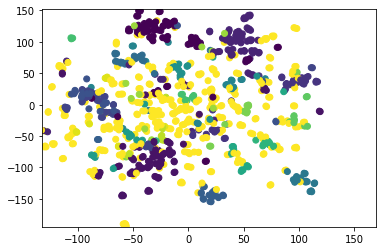

In [84]:
plt.scatter(components_df.dim1, components_df.dim2,c=components_df.color_idx)

#for idx,row in components_df.iterrows():
#    label, x, y = row[0],row[1],row[2]
#    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.xlim(components_df.dim1.min(), 170)
plt.ylim(components_df.dim2.min()-1, components_df.dim2.max()+1)
plt.show()

In [89]:
import plotly.express as px
fig = px.scatter(x=short_df.dim1, 
                 y=short_df.dim2,
                 color=short_df.entity)
fig.show()

In [90]:
short_df.shape

(559, 4)